## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
trainDataCount=2000 #Max 10222
testDataCount=500  #10357

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = "/content/drive/My Drive/Colab Notebooks/R7/Project2/DogBreed_Classification/"
dest_path = "/content/drive/My Drive/Colab Notebooks/R7/Project2/DC/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
# Executed once, commented as it was taking a lot of time
#from zipfile import ZipFile
#with ZipFile(project_path+'train.zip', 'r') as z:
#  z.extractall(path=dest_path)

Repeat the same step for test.zip

In [0]:
# Executed once, commented as it was taking a lot of time
#with ZipFile(project_path+'test.zip', 'r') as z2:
#  z2.extractall(path=dest_path)

Repeat the same step for sample_submission.csv.zip

In [0]:
#with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z3:
#  z3.extractall(path=dest_path)

Repeat the same step for labels.csv.zip

In [0]:
#with ZipFile(project_path+'labels.csv.zip', 'r') as z4:
#  z4.extractall(path=dest_path)

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

In [0]:
import pandas as pd

### Read labels.csv file using pandas

In [9]:
ls

drive/  sample_data/


In [0]:
labels = pd.read_csv(dest_path+'labels.csv')

In [11]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [12]:
labels.breed.value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [0]:
#breeds = labels.breed.value_counts().index

In [0]:
#train = labels[labels.breed.isin(breeds)]

In [15]:
submission = pd.read_csv(dest_path + 'sample_submission.csv')
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
import cv2 
from tqdm import tqdm
import numpy as np

In [17]:
labels.count

<bound method DataFrame.count of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

In [0]:
X=[]
y=[]

In [19]:
for i,imgName in tqdm(labels.head(trainDataCount).values):
  img = cv2.imread(dest_path + '/train/' + i + ".jpg") 
  img_resize=cv2.resize(img,(128,128))
  X.append(img_resize)
  y.append(imgName)

100%|██████████| 2000/2000 [00:14<00:00, 139.31it/s]


In [20]:
y[0]

'boston_bull'

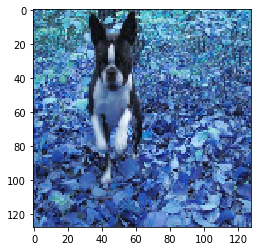

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

### Get one-hot encodings of labels

In [22]:
y_train_data = pd.get_dummies(data = y, dummy_na = False)
y_train_data.head()

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,english_foxhound,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [23]:
type(X)

list

In [24]:
len(X[4])

128

In [0]:
x_arr = np.asarray(X);
x_d = x_arr.reshape(x_arr.shape[0], 128, 128, 3).astype('float32')
x_train_data = x_d/255

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.25, random_state=42)

### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [27]:
submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [28]:
submission.count

<bound method DataFrame.count of                                      id  ...  yorkshire_terrier
0      000621fb3cbb32d8935728e48679680e  ...           0.008333
1      00102ee9d8eb90812350685311fe5890  ...           0.008333
2      0012a730dfa437f5f3613fb75efcd4ce  ...           0.008333
3      001510bc8570bbeee98c8d80c8a95ec1  ...           0.008333
4      001a5f3114548acdefa3d4da05474c2e  ...           0.008333
...                                 ...  ...                ...
10352  ffeda8623d4eee33c6d1156a2ecbfcf8  ...           0.008333
10353  fff1ec9e6e413275984966f745a313b0  ...           0.008333
10354  fff74b59b758bbbf13a5793182a9bbe4  ...           0.008333
10355  fff7d50d848e8014ac1e9172dc6762a3  ...           0.008333
10356  fffbff22c1f51e3dc80c4bf04089545b  ...           0.008333

[10357 rows x 121 columns]>

In [0]:
test_img=submission.head(testDataCount).id

In [30]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

In [31]:
test_img_data = pd.get_dummies(data = test_img, dummy_na = False)
test_img_data = test_img_data.iloc[:,0:120]
test_img_data.head()

,000621fb3cbb32d8935728e48679680e,00102ee9d8eb90812350685311fe5890,0012a730dfa437f5f3613fb75efcd4ce,001510bc8570bbeee98c8d80c8a95ec1,001a5f3114548acdefa3d4da05474c2e,00225dcd3e4d2410dd53239f95c0352f,002c2a3117c2193b4d26400ce431eebd,002c58d413a521ae8d1a5daeb35fc803,002f80396f1e3db687c5932d7978b196,0036c6bcec6031be9e62a257b1c3c442,0041940322116ae58c38130f5a6f71f9,0042d6bf3e5f3700865886db32689436,004476c96f575879af4af471af65cae8,00485d47de966a9437ad3b33ac193b6f,00496f65de6cc319145ce97bd6e90360,004bf14426d1a830d459a9e0c0721309,004c3721eb88358f462cdcec6b2380b7,00559f56aab7e0a7749220f6aed65162,005b281f1a4d6f29d527c9585e9bd33c,005b6c6c76fefd6b458ef6fb6e54da6e,006870b49353779b25eeb91fed43c31a,0068f3a21b159ece126a28580cdad7a0,0069b1cc4546fc98f84f981bf9a0696a,0077bc3c63486ff09d3774d956af8f76,00780e5d2bf4f7e4b5f96d08ddde669a,007ed71136966728f5c0936e23c8286b,0081831ceb49cd64212c32b884036b82,00846c0edd5aa4f10ee5e9b84d7310a6,0092bd9e90a13403373fc0e9e1218938,009a3c4f6626e4750f74ceb8e8ed8760,00a3edd22dc7859c487a64777fc8d093,00a558277e1f03b71d8c813e03344ddf,00a6892e5c7f92c1f465e213fd904582,00b29dbc49177cd4faeac3c485330af9,00b43aa6064fa6733a391d41fe4c6803,00b965deff7c711cfeaa927ce52f8653,00bbbcb2bf285af6304bd4da0c10299e,00bbfaa5b2bff32a3dc8ce1563e484a3,00c14d34a725db12068402e4ce714d4c,00c610a43b661e4fc612d06db96ce258,...,01cb83d33e905e825df41b88dd4ef277,01cd792c6360ff9300ca60be40487549,01ce0bd1dff470548ac5c5122aa2d44f,01d333d5c288be97bffd76005f559f41,01d5ffa4de01074483149bec0f6e5a59,01d9fc5195f7cd2ca9e12b9c9e3eaca2,01deef5e85f2573f4689780b94aa58c0,01df86b786d0a5b4cde3713a1314ceaf,01f3be56aaa63fb47fd576a17f1f60b6,01fc8d4fec16bb8dcb5a0e60db1dc7fb,0201de3d74ad48774e0bd55d04d2966d,02094b19b383b85741353fc00c085895,020999e4f2b9509d90a59de565a0c723,020d14c04769cdc0aba82befd41816da,02113c6c2c25cb7bfe1d743c17a93b0d,021ad1825ea4fc5c0af6edc805fbcb8e,02215f26ca6ece8786daecc15c60e774,0223272e92ee6b7e9fc4cf48dbd7d167,023c0a9675c4e09e7de76be0fad3d52f,0243ae2c5882404028214ebc9806b453,0248cea990be4ebfbbba3c584f43a645,025156133d8d8700f6c7027371b1b8e0,0259f8dda68116cff1170758a5fea1db,02653e78d9f92bfcf002bd51395b65b7,026fd54ef87fdc261fb0fb49cddfddd1,0277800862437e1e637bc6e73a928b96,02804190c4ffc82b073d9f0036f66bc6,028bd6c628883784fd39841e9e26a02c,028f76e33c078292b0f5687a7179f15e,0292b3dfcab314b7b2bf705f80565508,0298eb3d74444d2c405639d51c220bc2,02a3052cd5eaf8af934c30bffbd268d3,02ad3d182823ba4055223ab2cf7d2ef9,02b0ccb5d316cf4662e8784a68e7a3d2,02b9adaa40397a4977b9646cc6c939dc,02bac257d1266986775db090b547123f,02bddf9bf24c6c04e2177d57e23040b1,02c0b96061207aabfb04efe8b969feca,02cc60bd987fc625224fa28da98f1fac,02ce818b70734ce460d0ffc47e6b9682
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []

In [33]:
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    #img = cv2.imread(dest_path + '/test/' + f + ".jpg".format(f), 0)
    img = cv2.imread(dest_path + '/test/' + f + ".jpg")
    img_resize = cv2.resize(img, (128, 128)) 
    x_test_feature.append(img_resize)

100%|██████████| 500/500 [00:53<00:00,  2.32it/s]


Normalize the test data and convert it into 4 dimensions

In [34]:
len(x_test_feature)
type(x_test_feature)

list

In [0]:
x_test_arr = np.asarray(x_test_feature);

In [0]:
x_test_d = x_test_arr.reshape(x_test_arr.shape[0], 128, 128, 3).astype('float32')

In [0]:
x_test_data = x_test_d/255

In [38]:
type(x_test_arr)
len(x_test_arr)

500

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
model1 = Sequential()

In [66]:
# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(128, 128, 3)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """


In [0]:
model1.add(Flatten())
model1.add(Dense(256))
model1.add(Activation('relu'))

In [0]:
# Prediction Layer
model1.add(Dense(120))
model1.add(Activation('softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [44]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
print(X_train.shape)
print(y_train.shape[1])
print(X_val.shape)
print(y_val.shape)

(1500, 128, 128, 3)
120
(500, 128, 128, 3)
(500, 120)


In [46]:
 model1.fit(X_train, y_train, batch_size=128, epochs=10, 
              validation_data=(x_test_data,test_img_data))
 #X_val, y_val

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1500 samples, validate on 500 samples
Epoch 1/10





1500/1500 [==============================] - 9s 6ms/step - loss: 10.6856 - acc: 0.0073 - val_loss: 1.1514 - val_acc: 0.0060
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 4.7525 - acc: 0.1213 - val_loss: 1.1584 - val_acc: 0.0020
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 4.2092 - acc: 0.2613 - val_loss: 1.2104 - val_acc: 0.0060
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 2.0184 - acc: 0.7040 - val_loss: 1.4084 - val_acc: 0.0000e+00
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3984 - acc: 0.9567 - val_loss: 1.8901 - val_acc: 0.0020
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0342 - acc: 0.9980 - val_loss: 2.0178 - val_acc: 0.0020
Epoch 7/10
1500/1500 [====================

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
train_generator=datagen.fit(X_train)

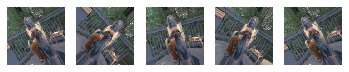

In [48]:
gen = datagen.flow(X_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [0]:
model2 = Sequential()

In [50]:
# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(128, 128, 3)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

model2.add(Flatten())
model2.add(Dense(256))
model2.add(Activation('relu'))
# Prediction Layer
model2.add(Dense(120))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """


### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [51]:
model2.fit_generator(datagen.flow(X_train,y_train, batch_size=128), epochs=10, 
              validation_data=(x_test_data,test_img_data))

Epoch 1/10
12/12 [==============================] - 7s 569ms/step - loss: 15.0307 - acc: 0.0087 - val_loss: 3.7920 - val_acc: 0.0020
Epoch 2/10
12/12 [==============================] - 6s 478ms/step - loss: 8.2958 - acc: 0.0096 - val_loss: 1.1489 - val_acc: 0.0000e+00
Epoch 3/10
12/12 [==============================] - 6s 458ms/step - loss: 4.7726 - acc: 0.0130 - val_loss: 1.1562 - val_acc: 0.0000e+00
Epoch 4/10
12/12 [==============================] - 5s 451ms/step - loss: 4.7042 - acc: 0.0255 - val_loss: 1.1658 - val_acc: 0.0000e+00
Epoch 5/10
12/12 [==============================] - 5s 453ms/step - loss: 4.5889 - acc: 0.0336 - val_loss: 1.1771 - val_acc: 0.0060
Epoch 6/10
12/12 [==============================] - 6s 461ms/step - loss: 4.4253 - acc: 0.0634 - val_loss: 1.2560 - val_acc: 0.0020
Epoch 7/10
12/12 [==============================] - 5s 453ms/step - loss: 4.2269 - acc: 0.0766 - val_loss: 1.3208 - val_acc: 0.0040
Epoch 8/10
12/12 [==============================] - 5s 454ms/st

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [52]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(dest_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Print the summary of the base_model

In [53]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
base_model.add_update(Flatten())
base_model.add_update(Dense(1024))
base_model.add_update(Activation('relu'))

base_model.add_update(Dense(256))
base_model.add_update(Activation('relu'))

# Prediction Layer
base_model.add_update(Dense(120))
base_model.add_update(Activation('softmax'))

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
base_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
print(X_train.shape)
print(y_train.shape[1])
print(X_val.shape)
print(y_val.shape)

In [67]:
base_model.fit_generator(datagen.flow(X_train,y_train, batch_size=128), epochs=10, 
              validation_data=(X_val,y_val))

ValueError: ignored

In [63]:
datagen.flow(X_train,y_train)

In [0]:
base_model.fit(X_train, y_train, batch_size=128, epochs=10, 
              validation_data=(X_val,y_val))

Please suggest what could have gone wrong. I was not able to figure out the issue here.